## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [28]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [29]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

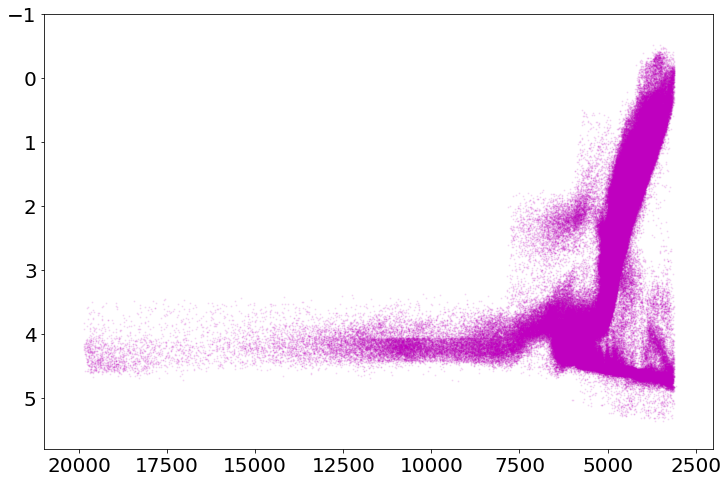

In [20]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='m',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

linear:0.030,0.019
polynomial:-0.042,-0.084,0.006,0.021
sigmoid:-0.871, 25.265,0.070,-0.055


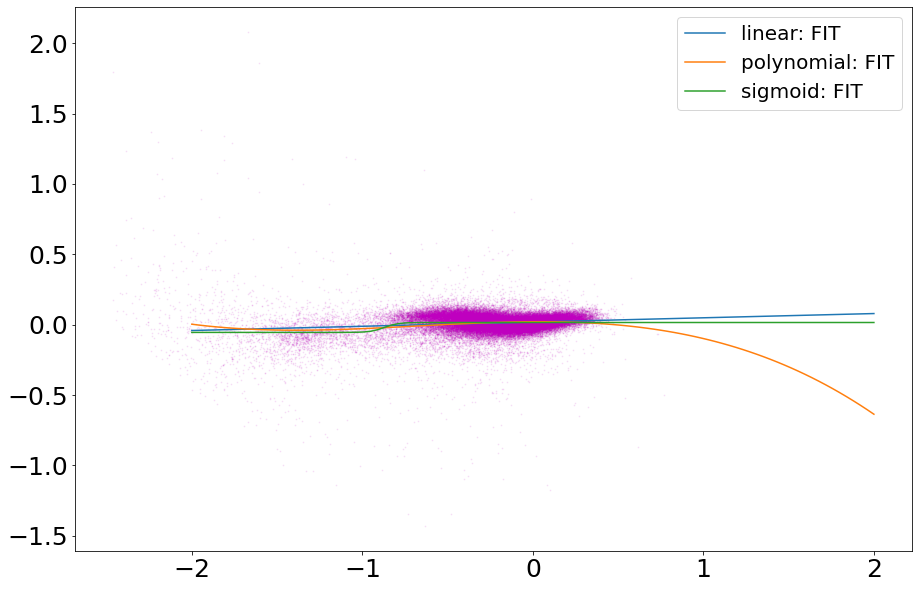

In [21]:
# write you fitting code and plot the results here
             
badbits = 2**23        

suspectbits = 2**16   



star_hdus = fits.open('miniDR17.fits')
starA = star_hdus[1].data
star_hdus.close()
starA = starA[~np.isnan(starA['Fe_H'])]
starA = starA[~np.isnan(starA['NI_FE'])]
starA = starA[~np.isnan(starA['FE_H_ERR'])]
starA = starA[~np.isnan(starA['NI_FE_ERR'])]


ct = (np.bitwise_and(starA['aspcapflag'],badbits) == 0) &\
     (np.bitwise_and(starA['starflag'],suspectbits) == 0) &\
     (starA['GLAT'] > 60) 

cut=np.where(ct)[0]

slope,intercept=mcFit2(linear,starA['Fe_H'][cut],starA['NI_FE'][cut],starA['Fe_H'][cut]/1000,starA['Fe_H'][cut]/1000,p0=[0,0])
print(f'linear:{slope:.3f},{intercept:.3f}')


polyA,polyB,polyC,polyD=mcFit4(poly3,starA['Fe_H'][cut],starA['NI_FE'][cut],starA['Fe_H_ERR'][cut],starA['NI_FE_ERR'][cut],p0=[1,1,1,1])
print(f'polynomial:{polyA:.3f},{polyB:.3f},{polyC:.3f},{polyD:.3f}')


cfA,cfB,cfC,cfD=mcFit4(sigmoid,starA['Fe_H'][cut],starA['NI_FE'][cut],starA['Fe_H'][cut]/1000,starA['Fe_H'][cut]/1000,p0=[0,1,-1,0.5])
print(f'sigmoid:{cfA:.3f}, {cfB:.3f},{cfC:.3f},{cfD:.3f}')


fig_1=plt.figure(figsize=(15,10))
ax_1=fig_1.add_subplot(111)
ax_1.xaxis.set_tick_params(labelsize=25)
ax_1.yaxis.set_tick_params(labelsize=25)
ax_1.scatter(starA['FE_H'][cut],starA['NI_FE'][cut],s=0.5,c='m',alpha=0.1)



x_plot = np.linspace(-2,2,100)

ax_1.plot(x_plot,linear(x_plot,slope,intercept),label='linear: FIT')

ax_1.plot(x_plot,poly3(x_plot,polyA,polyB,polyC,polyD),label='polynomial: FIT')

ax_1.plot(x_plot,sigmoid(x_plot,cfA,cfB,cfC,cfD), label='sigmoid: FIT')

plt.legend(loc='best',fontsize=20)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

linear: -0.000, 1.638
polynomial: 0.000, -0.001, 2.683


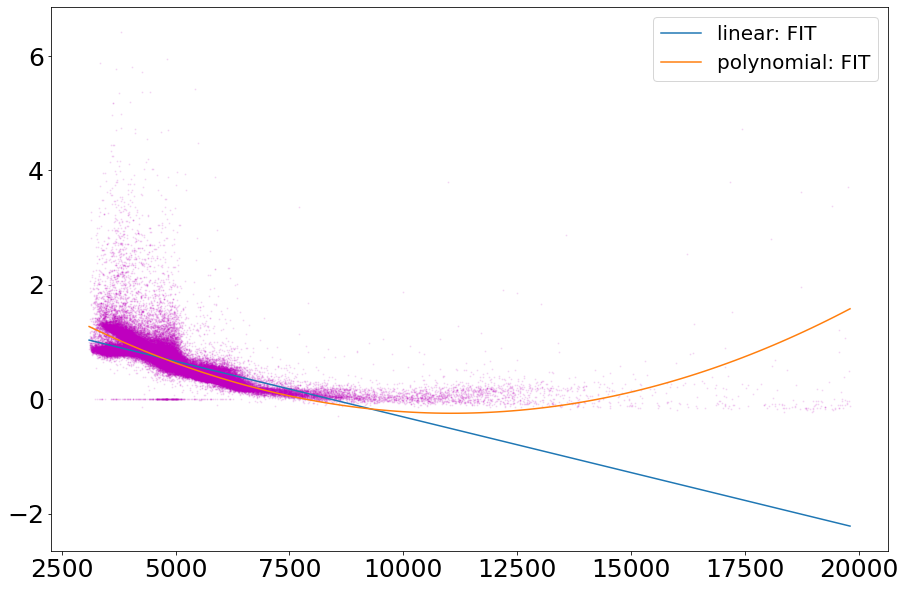

In [22]:
badbits = 2**23        
suspectbits = 2**16   

star_hdus = fits.open('miniDR17.fits')
starB = star_hdus[1].data
star_hdus.close()


starB=starB[~np.isnan(starB['TEFF'])]
starB=starB[~np.isnan(starB['J'])]
starB=starB[~np.isnan(starB['K'])]
starB=starB[~np.isnan(starB['J_ERR'])]
starB=starB[~np.isnan(starB['K_ERR'])]

ct_2 = (np.bitwise_and(starB['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starB['starflag'], suspectbits) == 0) &\
     (starB['GLAT'] < -10) 
cut_2 = np.where(ct_2)[0]



slope2, intercept2 = mcFit2(linear, starB['TEFF'][cut_2], (starB['J']-starB['K'])[cut_2], starB['TEFF_ERR'][cut_2]/1000, \
                          (np.sqrt((starB['J_ERR']**2)+starB['K_ERR']**2))[cut_2]/1000, p0=[0,0])
print(f'linear: {slope2:.3f}, {intercept2:.3f}')

polyA2, polyB2, polyC2,  = mcFit3(poly2, starB['TEFF'][cut_2], (starB['J']-starB['K'])[cut_2], starB['TEFF_ERR'][cut_2]/1000, \
                         (np.sqrt((starB['J_ERR']**2)+starB['K_ERR']**2))[cut_2]/1000,p0=[600,1,1])
print(f'polynomial: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')



fig_2 = plt.figure(figsize=(15,10))
ax_2 = fig_2.add_subplot(111)
ax_2.xaxis.set_tick_params(labelsize=25)
ax_2.yaxis.set_tick_params(labelsize=25)

ax_2.scatter(starB['TEFF'][cut_2],(starB['J']-starB['K'])[cut_2],s=1,c='m',alpha=0.1)


x_plot = np.linspace(min(starB['TEFF'][cut_2]), max(starB['TEFF'][cut_2]), 100)
ax_2.plot(x_plot,linear(x_plot, slope2, intercept2), label='linear: FIT')
ax_2.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2, ), label='polynomial: FIT')

plt.legend(loc='best', fontsize=20)
plt.show()

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

linear:-0.001, -3.966
polynomial:-0.000, 0.014, -1.781, 27.969
COSFIT:49.826, 0.023, 0.863, 0.585


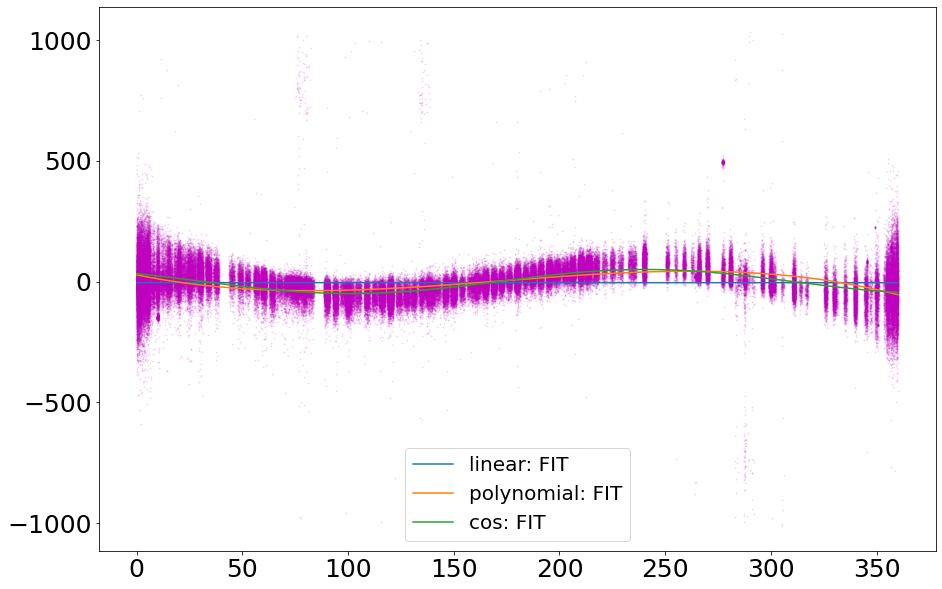

In [23]:
badbits = 2**23       
suspectbits = 2**16    

star_hdus = fits.open('miniDR17.fits')
starC = star_hdus[1].data
star_hdus.close()

starC=starC[~np.isnan(starC['GLON'])]
starC=starC[~np.isnan(starC['VHELIO_AVG'])]
starC=starC[~np.isnan(starC['VERR'])]



ct_3=(np.bitwise_and(starC['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starC['starflag'], suspectbits) == 0) &\
     ((-10<starC['GLAT']) & (10>starC['GLAT']))
cut_3=np.where(ct_3)[0]



slope3,intercept3 = mcFit2(linear, starC['GLON'][cut_3], starC['VHELIO_AVG'][cut_3], starC['GLON'][cut_3]/1000, \
                         starC['VERR'][cut_3]/1000, p0=[0,0])
print(f'linear:{slope3:.3f}, {intercept3:.3f}')


polyA3, polyB3, polyC3, polyD3,= mcFit4(poly3, starC['GLON'][cut_3], starC['VHELIO_AVG'][cut_3], starC['GLON'][cut_3]/1000, \
                         starC['VERR'][cut_3]/1000,p0=[600,1,1,1])
print(f'polynomial:{polyA3:.3f}, {polyB3:.3f}, {polyC3:.3f}, {polyD3:.3f}')

cfA3,cfB3,cfC3,cfD3 = mcFit4(cosfit, starC['GLON'][cut_3], starC['VHELIO_AVG'][cut_3], starC['GLON'][cut_3]/1000, \
                            0.000001,p0=[60,0.02,0,0])
print(f'COSFIT:{cfA3:.3f}, {cfB3:.3f}, {cfC3:.3f}, {cfD3:.3f}')



fig_3=plt.figure(figsize=(15,10))

ax_3=fig_3.add_subplot(111)

ax_3.xaxis.set_tick_params(labelsize=25)
ax_3.yaxis.set_tick_params(labelsize=25)


ax_3.scatter(starC['GLON'][cut_3],starC['VHELIO_AVG'][cut_3],s=1,c='m',alpha=0.1)

x_plot=np.linspace(0,360,400)

ax_3.plot(x_plot,linear(x_plot, slope3, intercept3), label='linear: FIT')

ax_3.plot(x_plot,poly3(x_plot, polyA3, polyB3, polyC3,polyD3 ), label='polynomial: FIT')

ax_3.plot(x_plot,cosfit(x_plot, cfA3, cfB3, cfC3, cfD3), label='cos: FIT')

plt.legend(loc='best', fontsize=20)

plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

linear: 0.002, 0.093
polynomial: -0.000, 0.001, -0.017, 0.132 


/var/folders/yr/xvppvhn13wx4_dmcx214tl1r0000gn/T/ipykernel_8707/3932149318.py:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/Users/diyavashani/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


exponential: 60.000, 1.000, -1.000, 0.500


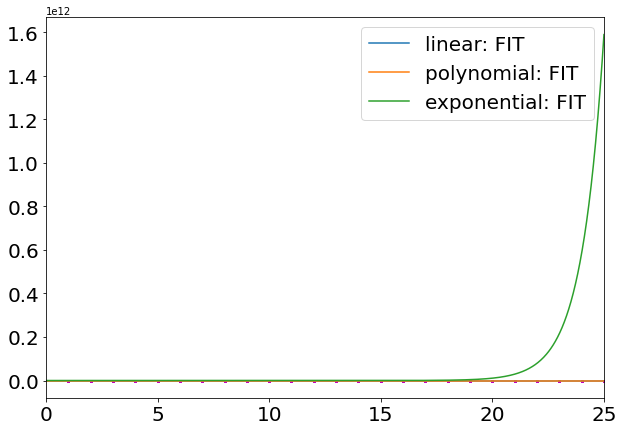

In [24]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters



star_hdus = fits.open('miniDR17.fits')
starD = star_hdus[1].data
star_hdus.close()

starD = starD[~np.isnan(starD['NVISTIS'])]
starD = starD[~np.isnan(starD['VERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct_4 = (np.bitwise_and(starD['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starD['starflag'], suspectbits) == 0) &\
     (starD['NVISTIS'] >= 1)
cut_4 = np.where(ct_4)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starD['NVISTIS'][cut_4], starD['VERR'][cut_4], starD['NVISTIS'][cut_4]/1000,
                          starD['VERR'][cut_4]/1000, p0=[0,0])
print(f'linear: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, starD['NVISTIS'][cut_4], starD['VERR'][cut_4], starD['NVISTIS'][cut_4]/1000,
                         starD['VERR'][cut_4]/1000, p0=[600,1,1,1])
print(f'polynomial: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f} ')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(logfit, starD['NVISTIS'][cut_4], starD['VERR'][cut_4], starD['NVISTIS'][cut_4]/1000,
                            starD['VERR'][cut_4]/1000,p0=[60,1,-1,0.5])
print(f'exponential: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig_4 = plt.figure(figsize=(10,7))
ax_4 = fig_4.add_subplot(111)
ax_4.xaxis.set_tick_params(labelsize=20)
ax_4.yaxis.set_tick_params(labelsize=20)


ax_4.scatter(starD['NVISTIS'][cut_4],(starD['VERR'])[cut_4],s=1,c='m',alpha=0.1)

plt.xlim(0, 25)


x_plot=np.linspace(0,25,1000)

ax_4.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax_4.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='polynomial: FIT')

ax_4.plot(x_plot,exponential(x_plot, cfA, cfB, cfC, cfD), label='exponential: FIT')

plt.legend(loc='best', fontsize=20)
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

linear: -0.011, 0.843
polynomial 3: 0.000, -0.000, -0.028, 2.796
polynomial 2: 0.000, -0.065, 4.091


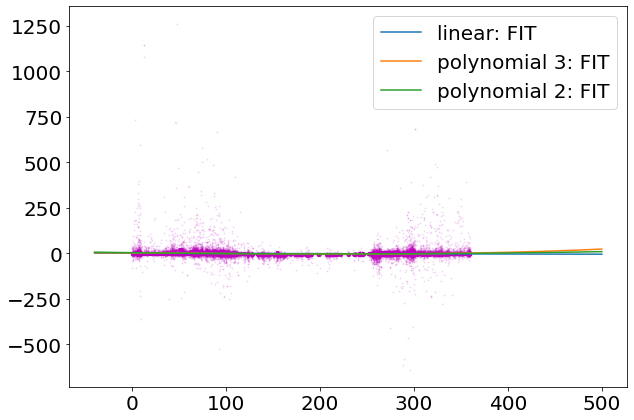

In [25]:
# write you fitting code and plot the results here


badbits = 2**23        
suspectbits = 2**16    


star_hdus = fits.open('miniDR17.fits')
starE = star_hdus[1].data
star_hdus.close()

starE = starE[~np.isnan(starE['RA'])]
starE = starE[~np.isnan(starE['GAIA_PMRA'])]



ct_5 = (np.bitwise_and(starE['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starE['starflag'], suspectbits) == 0) &\
     (starE['GLAT'] > -10) & (starE['GLAT'] < 10)
cut_5 = np.where(ct_5)[0]



slope, intercept = mcFit2(linear, starE['RA'][cut_5], starE['GAIA_PMRA'][cut_5], starE['RA'][cut_5]/1000,
                          starE['GAIA_PMRA'][cut_5]/1000, p0=[0,0])
print(f'linear: {slope:.3f}, {intercept:.3f}')


polyA, polyB, polyC, polyD = mcFit4(poly3, starE['RA'][cut_5], starE['GAIA_PMRA'][cut_5], starE['RA'][cut_5]/1000,
                         starE['GAIA_PMRA'][cut_5]/1000, p0=[1,1,1,1])
print(f'polynomial 3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')


cfA, cfB, cfC = mcFit3(poly2, starE['RA'][cut_5], starE['GAIA_PMRA'][cut_5], starE['RA'][cut_5]/1000,
                            starE['GAIA_PMRA'][cut_5]/1000,p0=[0,1,-1])
print(f'polynomial 2: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}')



fig_5 = plt.figure(figsize=(10,7))
ax_5 = fig_5.add_subplot(111)
ax_5.xaxis.set_tick_params(labelsize=20)
ax_5.yaxis.set_tick_params(labelsize=20)



x_plot = np.linspace(-40,500,100) 

y_plot = np.linspace(-5,5,100)

ax_5.scatter(starE['RA'][cut_5],(starE['GAIA_PMRA'])[cut_5],s=1,c='m',alpha=0.1)
ax_5.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax_5.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='polynomial 3: FIT')

ax_5.plot(x_plot,poly2(x_plot, cfA, cfB, cfC), label='polynomial 2: FIT')

plt.legend(loc='best', fontsize=20)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.001, -4.341
POLY3: -0.000, 0.000, -0.029, 36.362
POLY2: -0.000, 0.006, -13.506


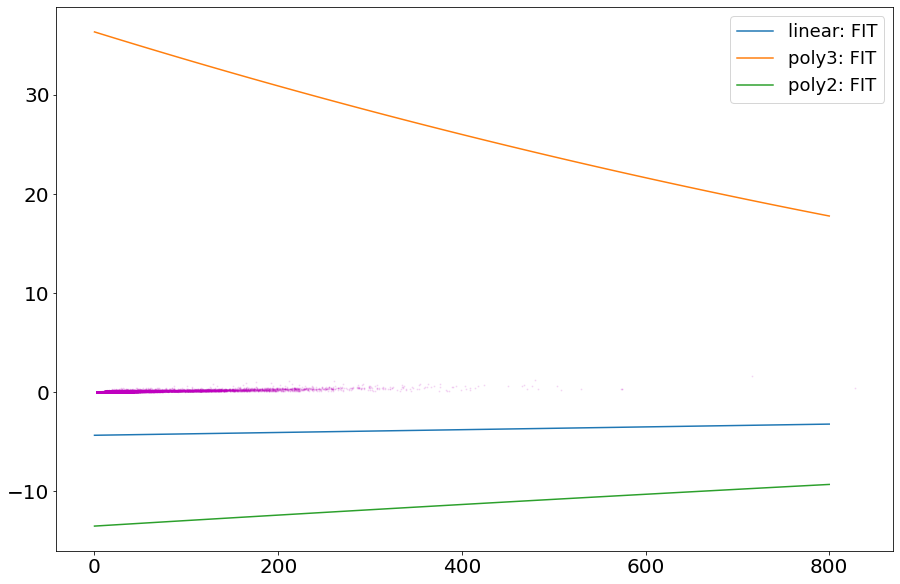

In [26]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters


star_hdus = fits.open('miniDR17.fits')
starF = star_hdus[1].data
star_hdus.close()

starF = starF[~np.isnan(starF['TEFF'])]
starF= starF[~np.isnan(starF['LOGG'])]
starF = starF[~np.isnan(starF['TEFF_ERR'])]
starF = starF[~np.isnan(starF['LOGG_ERR'])]



# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct6 = (np.bitwise_and(starF['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starF['starflag'], suspectbits) == 0) &\
     (starF['TEFF'] < 6000) & (starF['LOGG'] < 3)
cut_6 = np.where(ct6)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, starF['TEFF'][cut_6], starF['LOGG'][cut_6], starF['TEFF'][cut_6]/1000,
                          starF['LOGG'][cut_6]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC, polyD = mcFit4(poly3, starF['TEFF'][cut_6], starF['LOGG'][cut_6], starF['TEFF'][cut_6]/1000,
                         starF['LOGG'][cut_6]/1000, p0=[600,1,1,1])
print(f'POLY3: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}, {polyD:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC = mcFit3(poly2, starF['TEFF'][cut_6], starF['LOGG'][cut_6], starF['TEFF'][cut_6]/1000,
                            starF['LOGG'][cut_6]/1000,p0=[0,0,0])
print(f'POLY2: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}')

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA

fig_6 = plt.figure(figsize=(15,10))
ax_6 = fig_6.add_subplot(111)
ax_6.xaxis.set_tick_params(labelsize=20)
ax_6.yaxis.set_tick_params(labelsize=20)

ax_6.scatter(starF['TEFF_ERR'][cut_6],starF['LOGG_ERR'][cut_6],s=1,c='m',alpha=0.1)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(0,800,100) # X-PLOTING FOR FITS
#linear fit
ax_6.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax_6.plot(x_plot,poly3(x_plot, polyA, polyB, polyC, polyD), label='poly3: FIT')
#cosfit
ax_6.plot(x_plot,poly2(x_plot, cfA, cfB, cfC), label='poly2: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.985, -0.971
POLY2: 0.002, -1.101, -0.781
POLY3: -0.000, 0.009, -1.243, -0.598


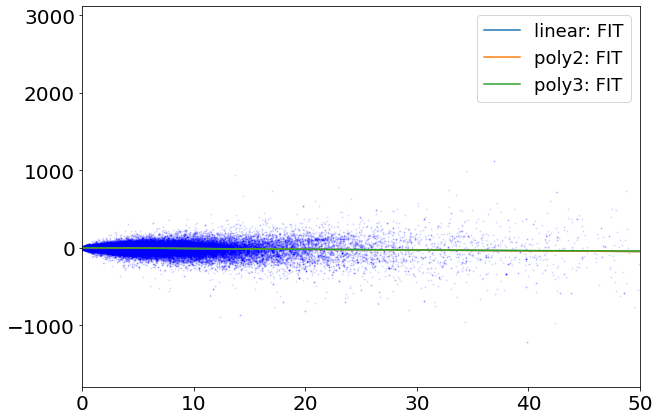

In [31]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star_hdus = fits.open('miniDR17.fits')
starG = star_hdus[1].data
star_hdus.close()

starG=starG[~np.isnan(starG['GAIA_PARALLAX'])]
starG=starG[~np.isnan(starG['GAIA_PARALLAX_ERROR'])]
starG=starG[~np.isnan(starG['GAIA_PMRA'])]
starG=starG[~np.isnan(starG['GAIA_PMRA_ERROR'])]

ct7 = (np.bitwise_and(starG['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(starG['starflag'], suspectbits) == 0) 
      
cut_7 = np.where(ct7)[0]


## LINEAR FIT (2 parameter)
slope1, intercept1 = mcFit2(linear, starG['GAIA_PARALLAX'][cut_7], starG['GAIA_PMRA'][cut_7],  \
                          starG['GAIA_PMRA_ERROR'][cut_7]/1000, p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')

## POLY2 FIT (3 parameter)
polyA1, polyB1, polyC1,  = mcFit3(poly2, starG['GAIA_PARALLAX'][cut_7], starG['GAIA_PMRA'][cut_7], starG['GAIA_PARALLAX_ERROR'][cut_7]/1000,  \
                         starG['GAIA_PMRA_ERROR'][cut_7]/1000,p0=[600,1,1])

print(f'POLY2: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}')
## POLY3 FIT (4 parameter)
cfA1, cfB1, cfC1, cfD1 = mcFit4(poly3, starG['GAIA_PARALLAX'][cut_7], starG['GAIA_PMRA'][cut_7], starG['GAIA_PARALLAX_ERROR'][cut_7]/1000, \
                            starG['GAIA_PMRA_ERROR'][cut_7]/1000,p0=[0,1,-1,0.5])
print(f'POLY3: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(starG['GAIA_PARALLAX'][cut_7],starG['GAIA_PMRA'][cut_7],s=1,c='b',alpha=0.1)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,50,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA1, polyB1, polyC1 ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA1, cfB1, cfC1, cfD1), label='poly3: FIT')

plt.xlim(0, 50)
plt.legend(loc='best', fontsize=18)
plt.show()